# **Single emitter self-energy in an extended SSH bath**
In this notebook, we provide the code for computing the self-energy of a quantum emitter coupled to a photonic environment described by the extended SSH model. For a chiral-symmetric one-dimensional bath, the self-energy is a complex function given by
\begin{equation}
\Sigma_e(z) = \frac{g^2}{4\pi}\int_\text{BZ}dk\;\frac{1}{z+\omega(k)}+\frac{1}{z-\omega(k)} \;,
\end{equation}
where $\pm\omega(k)$ represents the two-band spectrum of the extended SSH bath hamiltonian and $g$ is the emitter-field coupling constant.

In [ ]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

Within the Markovian approximation, the real and imaginary parts of the self-energy evaluated at the emitter's energy $\Delta$ determines how both $\Delta$ and the lifetime of an emitter's excitation are renormalized due to the interaction with the reservoir.
\begin{equation}
\Sigma_e(\Delta+i0^+)= \delta\omega_e(\Delta) - i\frac{\Gamma_e(\Delta)}{2}
\end{equation}

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/

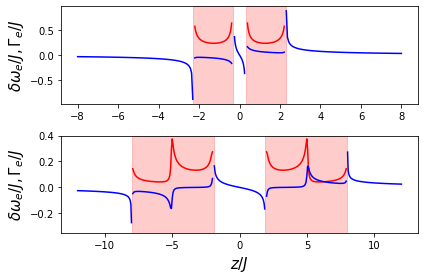

In [ ]:
def Sigma_e(z, hoppings, omega, g, eps, m=10):
    
    # Let's start by discretizing the Brillouin zone
   
    N = 2**m + 1
    k = np.linspace(-np.pi, np.pi, N)
    
    # We can now compute the vector of frequencies associated to k, and 
    # sale z to be an array-like object with the dimensions of k
    
    frec = omega(hoppings, k)
    zt = (z - 1j*eps)*np.ones(len(k), dtype = complex)
    
    # We are now ready to define the function we are aiming to integrate
    
    f = ( g**2/(4*np.pi)  ) * (  1/(zt - frec) + 1/(zt + frec))
    
    lamb = integrate.romb(np.real(f), (2*np.pi)/N)
    decay = integrate.romb(np.imag(f), (2*np.pi)/N)
    
    return np.real(lamb), 2*np.real(decay)
    
# Now, we only need to pick our dispersion relations of interest, with a
# built-in fixation of parameters

def omega_essh(hoppings, k):
    
    # Retrieve hoppings from list
    t1, t2, r1, r2 = hoppings
    
    dx = t1 + t2*np.cos(k) + r1*np.cos(k) + r2*np.cos(2*k)
    dy = t2*np.sin(k) + r2*np.sin(2*k) - r1*np.sin(k)
    omega = np.sqrt(dx**2 + dy**2, dtype = complex)
    
    return omega


# We are now going to proceed analogously for the general eSSH model

g = 0.5
N = 2**10 + 1
k = np.linspace(-np.pi, np.pi, N)

hoppings = (1, 1, 0, 0.3)
maxim, minim = np.amax(omega_essh(hoppings, k)), np.amin(omega_essh(hoppings, k))

x = np.linspace(-minim+0.05, minim-0.05, 100)
x_pos = np.linspace(maxim+0.01, 8, 100)
x_neg = np.linspace(-8, -maxim-0.01, 100)

x_up = np.linspace(minim+0.09, maxim-0.09, 100)
x_down = -x_up

s = np.zeros((len(x)))
s_neg, s_pos = np.zeros((len(x_neg))), np.zeros((len(x_pos)))
s_up = np.zeros((len(x_up)))
s_down = np.zeros((len(x_down)))
decay_up = np.zeros((len(x_up)))
decay_down = np.zeros((len(x_down)))

for i in range(len(x)):
    s[i], _ = Sigma_e(x[i], hoppings, omega_essh, g, 0)
    s_neg[i], _ = Sigma_e(x_neg[i], hoppings, omega_essh, g, 0)
    s_pos[i], _ = Sigma_e(x_pos[i], hoppings, omega_essh, g, 0)
    
    lamb, decay = Sigma_e(x_up[i], hoppings, omega_essh, g, 4*np.pi/(2**10+1))
    s_up[i] = lamb
    decay_up[i] = decay
    
    lamb, decay = Sigma_e(x_down[i], hoppings, omega_essh, g, 4*np.pi/(2**10+1))
    s_down[i] = lamb
    decay_down[i] = decay
    
    
fig, axes = plt.subplots(nrows=2, ncols=1)

axes[0].plot(x_neg, s_neg, color = 'blue')
axes[0].plot(x, s, color = 'blue', label = '$\delta\omega_e$')
axes[0].plot(x_pos, s_pos, color = 'blue')
axes[0].plot(x_up, decay_up, color = 'red', label = '$\Gamma_e$')
axes[0].plot(x_up, s_up, color = 'blue')
axes[0].plot(x_down, decay_down, color = 'red')
axes[0].plot(x_down, s_down, color = 'blue')
axes[0].axvspan(-maxim, -minim, alpha=0.2, color='red')
axes[0].axvspan(minim, maxim, alpha=0.2, color='red')
axes[0].set_ylabel('$\delta\omega_e, \Gamma_e/J$', fontsize = 10)
plt.tight_layout()

# Large long-range hoppings

g = 0.5
N = 2**10 + 1
k = np.linspace(-np.pi, np.pi, N)

hoppings = (1, 1, 2, 4)
maxim, minim = np.amax(omega_essh(hoppings, k)), np.amin(omega_essh(hoppings, k))

x = np.linspace(-minim+0.05, minim-0.05, 100)
x_pos = np.linspace(maxim+0.01, 12, 100)
x_neg = np.linspace(-12, -maxim-0.01, 100)

x_up = np.linspace(minim+0.09, maxim-0.09, 100)
x_down = -x_up

s = np.zeros((len(x)))
s_neg, s_pos = np.zeros((len(x_neg))), np.zeros((len(x_pos)))
s_up = np.zeros((len(x_up)))
s_down = np.zeros((len(x_down)))
decay_up = np.zeros((len(x_up)))
decay_down = np.zeros((len(x_down)))

for i in range(len(x)):
    s[i], _ = Sigma_e(x[i], hoppings, omega_essh, g, 0)
    s_neg[i], _ = Sigma_e(x_neg[i], hoppings, omega_essh, g, 0)
    s_pos[i], _ = Sigma_e(x_pos[i], hoppings, omega_essh, g, 0)
    
    lamb, decay = Sigma_e(x_up[i], hoppings, omega_essh, g, 20*np.pi/(2**10+1))
    s_up[i] = lamb
    decay_up[i] = decay

    lamb, decay = Sigma_e(x_down[i], hoppings, omega_essh, g, 20*np.pi/(2**10+1))
    s_down[i] = lamb
    decay_down[i] = decay

axes[1].plot(x_neg, s_neg, color = 'blue')
axes[1].plot(x, s, color = 'blue', label = '$\delta\omega_e$')
axes[1].plot(x_pos, s_pos, color = 'blue')
axes[1].plot(x_up, decay_up, color = 'red', label = '$\Gamma_e$')
axes[1].plot(x_up, s_up, color = 'blue')
axes[1].plot(x_down, decay_down, color = 'red')
axes[1].plot(x_down, s_down, color = 'blue')
axes[1].axvspan(-maxim, -minim, alpha=0.2, color='red')
axes[1].axvspan(minim, maxim, alpha=0.2, color='red')
axes[1].set_ylim([-0.35,0.4])
axes[0].set_ylabel('$\delta\omega_e/J,\Gamma_e/J$', fontsize=15)
axes[1].set_ylabel('$\delta\omega_e/J,\Gamma_e/J$', fontsize=15)
axes[1].set_xlabel('$z/J$', fontsize = 15)
plt.tight_layout()
